In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_real = pd.read_csv("True.csv", engine="python", encoding="latin-1")

In [ ]:
df_real.shape

(21417, 4)

In [ ]:
df_real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
df_real['target'] =1 # for real data

In [ ]:
df_real.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
# Loading Fake news

In [ ]:
df_fake = pd.read_csv('Fake.csv',engine="python", encoding="latin-1")

In [ ]:
df_fake.shape

(23481, 4)

In [ ]:
df_fake['target'] = 0 #for fake news

In [ ]:
df = pd.concat([df_real,df_fake],ignore_index=True)#merge the df_real and df_fake

In [ ]:
df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
df.shape

(44898, 5)

In [ ]:
23481+21417

44898

In [ ]:
df['target'].value_counts(normalize=True)*100

,proportion
target,
0,52.298543
1,47.701457


In [ ]:
#data set is balance

In [ ]:
df.head()#dropping subject and date
df.drop(columns=['subject','date'], inplace=True)

In [ ]:
df.head()

,title,text,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [ ]:
df.isnull().sum()

,0
title,0
text,0
target,0


In [ ]:
df.duplicated().sum()#check duplicated rows

np.int64(5793)

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()#no duplicate rows now

np.int64(0)

In [ ]:
df.shape

(39105, 3)

In [ ]:
import nltk

In [ ]:
#merging the title and text

In [ ]:
df['news'] = df['title'] + ' '+ df['text']

In [ ]:
df.drop(columns=['title','text'], inplace=True)

In [ ]:
df.head()

,target,news
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...


In [ ]:
df['num_characters'] = df['news'].apply(len)

In [ ]:
df.head()

,target,news,num_characters
0,1,"As U.S. budget fight looms, Republicans flip t...",4792
1,1,U.S. military to accept transgender recruits o...,4190
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,2886
3,1,FBI Russia probe helped by Australian diplomat...,2545
4,1,Trump wants Postal Service to charge 'much mor...,5310


In [ ]:
df['num_words'] = df['news'].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,news,num_characters,num_words
0,1,"As U.S. budget fight looms, Republicans flip t...",4792,861
1,1,U.S. military to accept transgender recruits o...,4190,691
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,2886,512
3,1,FBI Russia probe helped by Australian diplomat...,2545,428
4,1,Trump wants Postal Service to charge 'much mor...,5310,976


In [ ]:
df['num_sentences'] = df['news'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,news,num_characters,num_words,num_sentences
0,1,"As U.S. budget fight looms, Republicans flip t...",4792,861,30
1,1,U.S. military to accept transgender recruits o...,4190,691,21
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,2886,512,17
3,1,FBI Russia probe helped by Australian diplomat...,2545,428,16
4,1,Trump wants Postal Service to charge 'much mor...,5310,976,40


In [ ]:
numeric_col = df.select_dtypes(include='number')

In [ ]:
numeric_col.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,-0.030564,-0.060110,-0.019509
num_characters,-0.030564,1.000000,0.992759,0.884013
num_words,-0.060110,0.992759,1.000000,0.897108
num_sentences,-0.019509,0.884013,0.897108,1.000000


In [ ]:
import seaborn as sns

<Axes: >

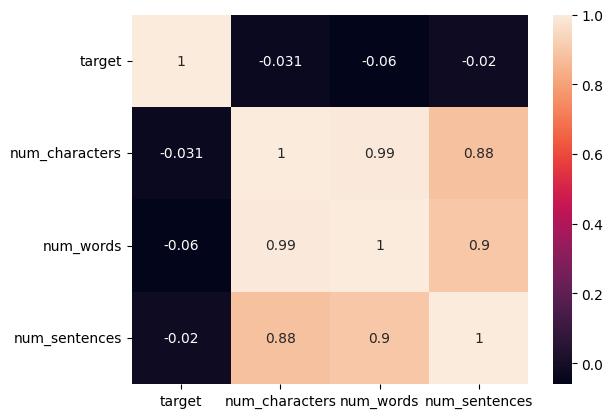

In [ ]:
sns.heatmap(numeric_col.corr(),annot=True)

In [ ]:
##Since there is a strong postive correlation among the three input variables, so we only taking num_words as there will be the
##problem of multicolinarity and since there is no correlation with target so we dropping them entierly

In [ ]:
df.drop(columns=['num_characters','num_sentences','num_words'],inplace=True)

In [ ]:
df.head()

,target,news
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...


## Text preprocessing:
- Lower case
- Tokenization
- Removing special characters
- removing stop words and puntucation
- stemming

In [ ]:
from nltk.corpus import stopwords
import string
string.punctuation
from nltk.stem.snowball import SnowballStemmer
snow = SnowballStemmer('english')

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
def transform_text(text):
    text = text.lower()#lower
    text = nltk.word_tokenize(text) #word tokenisation

    y = []

    for i in text:## removng special characters only selecting alpha numeric
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(snow.stem(i))

    return ' '.join(y)

In [ ]:
transform_text('I am dipen sherpa!,is and .')

'dipen sherpa'

In [ ]:
df['transform_news'] = df['news'].apply(transform_text)

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=600, height=600,min_font_size=10,background_color='white')

In [ ]:
realnews_wc = wc.generate(df[df['target'] ==1]['transform_news'].str.cat(sep = ' '))


In [ ]:
import matplotlib.pyplot as plt

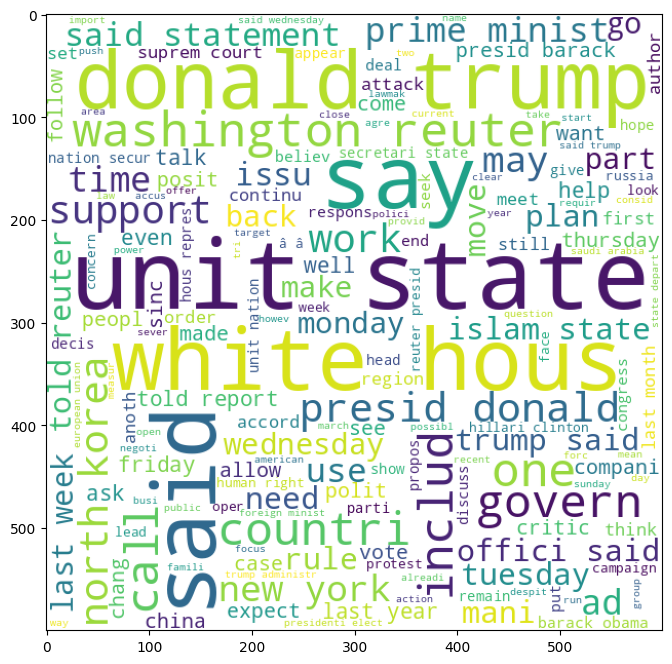

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(realnews_wc)

In [ ]:
## word cloud for the fake news

In [ ]:
fakenews_wc = wc.generate(df[df['target'] ==0]['transform_news'].str.cat(sep = ' '))

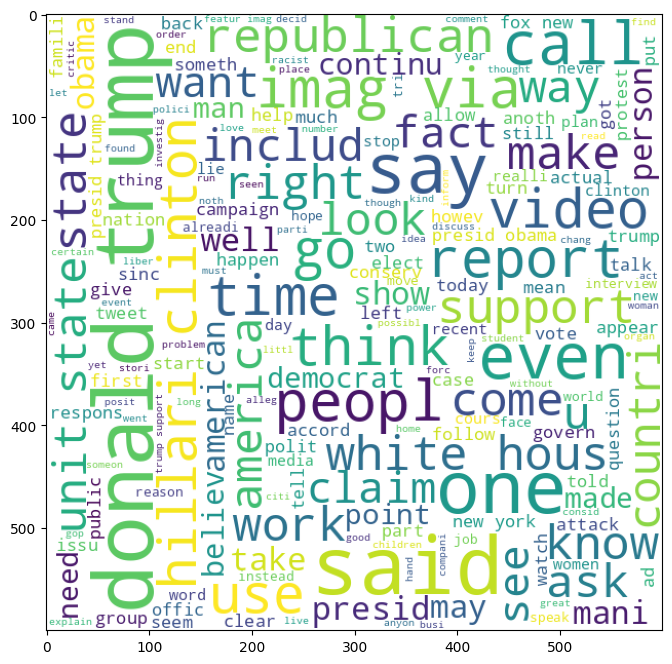

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(fakenews_wc)

In [ ]:
#making real news corpus
realnews_corpus = []
for msg in df[df['target']==1]['transform_news'].tolist():
  for word in msg.split():
    realnews_corpus.append(word)


In [ ]:
len(realnews_corpus)

4788647

In [ ]:
import seaborn as sns
from collections import Counter
word = pd.DataFrame(Counter(realnews_corpus).most_common(30))[0]
count = pd.DataFrame(Counter(realnews_corpus).most_common(30))[1]

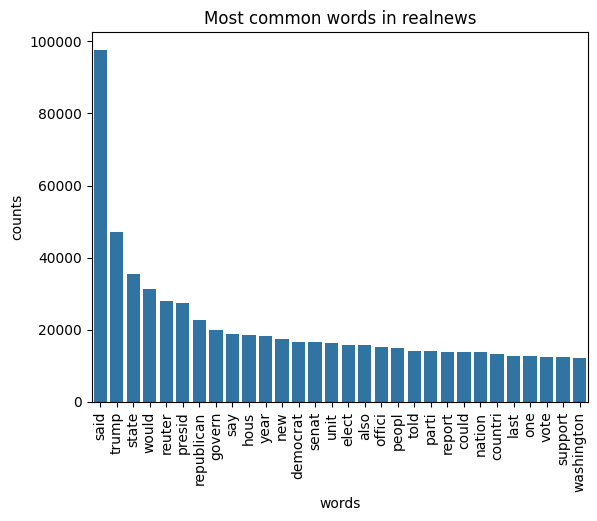

In [ ]:
sns.barplot(x= word,y= count)
plt.xticks(rotation = 90)
plt.title('Most common words in realnews')
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

In [ ]:
#fake news corpus
fakenews_corpus = []
for msg in df[df['target']==0]['transform_news'].tolist():
  for word in msg.split():
    fakenews_corpus.append(word)

In [ ]:
len(fakenews_corpus)

4088438

In [ ]:
import seaborn as sns
from collections import Counter
word = pd.DataFrame(Counter(fakenews_corpus).most_common(30))[0]
count = pd.DataFrame(Counter(fakenews_corpus).most_common(30))[1]

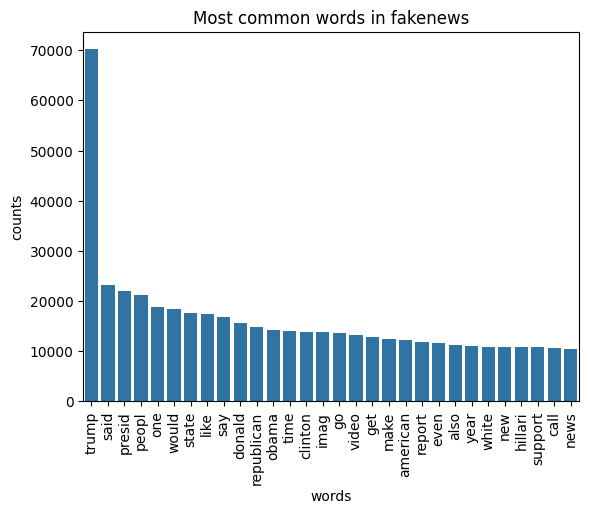

In [ ]:
sns.barplot(x= word,y= count)
plt.xticks(rotation = 90)
plt.title('Most common words in fakenews')
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

In [ ]:
## words are not much

In [ ]:
#### text to vectors for transformed_text

In [ ]:
#using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transform_news']).toarray()

In [ ]:
y  =df['target']

In [156]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [157]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [158]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [159]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(recall_score(y_test,y_pred1))

0.9087073264288454
[[3406  210]
 [ 504 3701]]
0.946305292763999
0.8801426872770511


In [160]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(recall_score(y_test,y_pred2))

0.9255849635596471
[[3341  275]
 [ 307 3898]]
0.9341001677450276
0.9269916765755053


In [161]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(recall_score(y_test,y_pred3))

0.9635596471039509
[[3473  143]
 [ 142 4063]]
0.9660009510223491
0.966230677764566


In [ ]:
## we get the highest accuracy socre from Benoli with 96%

In [ ]:
##now lets try all algorithm

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [163]:

dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
xgb = XGBClassifier()

In [167]:
models = {
    'DecisionTreeClassifier':dtc,
    'LogisticRegression':lrc,
    'RandomForestClassifier':rfc,
    'XGBClassifier':xgb
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train the model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # calculate accuracy
    #precision and recall
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # calculate accuracy
    #precision and recall

    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)

    print(list(models.keys())[i])
    print(f"Model: {list(models.keys())[i]}")

    print("Training set performance")
    print("Accuracy: {:.4f}".format(model_train_accuracy))
    print("Precision: {:.4f}".format(model_train_precision))
    print("Recall: {:.4f}".format(model_train_recall))

    print("\nTest set performance")
    print("Accuracy: {:.4f}".format(model_test_accuracy))
    print("Precision: {:.4f}".format(model_test_precision))
    print("Recall: {:.4f}".format(model_test_recall))

    print("="*35)
    print("\n")

DecisionTreeClassifier
Model: DecisionTreeClassifier
Training set performance
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000

Test set performance
Accuracy: 0.9922
Precision: 0.9908
Recall: 0.9948


LogisticRegression
Model: LogisticRegression
Training set performance
Accuracy: 0.9889
Precision: 0.9860
Recall: 0.9936

Test set performance
Accuracy: 0.9845
Precision: 0.9807
Recall: 0.9907


RandomForestClassifier
Model: RandomForestClassifier
Training set performance
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000

Test set performance
Accuracy: 0.9967
Precision: 0.9953
Recall: 0.9986


XGBClassifier
Model: XGBClassifier
Training set performance
Accuracy: 1.0000
Precision: 1.0000
Recall: 0.9999

Test set performance
Accuracy: 0.9968
Precision: 0.9948
Recall: 0.9993




In [ ]:
Noe:

Note: XG Boost gives the highest accuracy of 99.68, we will choose XG Boost

In [168]:
import pickle


In [169]:
#for model
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb, f)

#for vector tfidf
with open("tfidf.pkl", "wb") as f:
    pickle.dump(tfidf, f)